## before and after retired

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

In [3]:
import datetime
plt.rcParams["figure.figsize"] = [16,9]

In [6]:
def DataFilter(df1):
    df = df1.copy(deep=True)
    df['Vic'] = np.NAN
    df['GF'] = np.NAN
    df['GA'] = np.NAN
    df['GD'] = np.NAN
    df['ExpGf'] = np.NAN
    df['ExpGa'] = np.NAN
    df['ExpGd'] = np.NAN
    df['ExpPPM'] = np.NAN
    df['ExpRate'] = np.NAN
    for i in xrange(len(df)):
        tmp = df.score[i]
        #chapter_2.GF[i] = int(tmp[0])
        df.loc[i, 'GF'] = int(tmp[0])
        df.loc[i, 'GA'] = int(tmp[2])
        df.loc[i, 'GD'] = int(tmp[0]) - int(tmp[2])
        df.loc[i, 'Vic'] = float((tmp[0] > tmp[2]))
    df['ExpGf'] = df.GF.cumsum()
    df['ExpGa'] = df.GA.cumsum()
    df['ExpGd'] = df.GD.cumsum()
    df['ExpPPM'] = df.points.cumsum()
    df['ExpRate'] = df.Vic.cumsum()
    for i in xrange(len(df)):
        df.loc[i, 'ExpGf'] = df['ExpGf'][i] / (i+1)
        df.loc[i, 'ExpGa'] = df['ExpGa'][i] / (i+1)
        df.loc[i, 'ExpGd'] = df['ExpGd'][i] / (i+1)
        df.loc[i, 'ExpPPM'] = df['ExpPPM'][i] / (i+1)
        df.loc[i, 'ExpRate'] = df['ExpRate'][i] / (i+1)

    return df

In [4]:
start_8 = pd.to_datetime('6/1/2011')
end_8 = pd.to_datetime('4/19/2018')
df1 = pd.read_csv('./data/manchester-united/manchester-united_2011_2012.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/manchester-united/manchester-united_2012_2013.csv', index_col=0,  dtype={'points': float})
df3 = pd.read_csv('./data/manchester-united/manchester-united_2013_2014.csv', index_col=0,  dtype={'points': float})
df4 = pd.read_csv('./data/manchester-united/manchester-united_2014_2015.csv', index_col=0,  dtype={'points': float})
df5 = pd.read_csv('./data/manchester-united/manchester-united_2015_2016.csv', index_col=0,  dtype={'points': float})
df6 = pd.read_csv('./data/manchester-united/manchester-united_2016_2017.csv', index_col=0,  dtype={'points': float})
df7 = pd.read_csv('./data/manchester-united/manchester-united_2017_2018.csv', index_col=0,  dtype={'points': float})

chapter_8_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7])
chapter_8_raw.date = pd.to_datetime(chapter_8_raw.date)
chapter_8_raw = chapter_8_raw.sort_values(by='date')

mask = (chapter_8_raw.date >= start_8) & (chapter_8_raw.date <= end_8)

chapter_8_raw = chapter_8_raw.loc[mask]
chapter_8_raw = chapter_8_raw.reset_index(drop=True)

In [7]:
chapter_8 = DataFilter(chapter_8_raw)
chapter_8.tail(5)

,match_type,date,home,away,score,points,Vic,GF,GA,GD,ExpGf,ExpGa,ExpGd,ExpPPM,ExpRate
373,Champions League 2017/2018,2018-03-13,H,Sevilla FC,1:2 (0:0),0.0,0.0,1.0,2.0,-1.0,1.820856,0.965241,0.855615,1.954545,0.585561
374,FA Cup 2017/2018,2018-03-17,H,Brighton & Hove Albion,2:0 (1:0),3.0,1.0,2.0,0.0,2.0,1.821333,0.962667,0.858667,1.957333,0.586667
375,Premier League 2017/2018,2018-03-31,H,Swansea City,2:0 (2:0),3.0,1.0,2.0,0.0,2.0,1.821809,0.960106,0.861702,1.960106,0.587766
376,Premier League 2017/2018,2018-04-15,H,West Bromwich Albion,0:1 (0:0),0.0,0.0,0.0,1.0,-1.0,1.816976,0.960212,0.856764,1.954907,0.586207
377,Premier League 2017/2018,2018-04-18,A,AFC Bournemouth,2:0 (1:0),3.0,1.0,2.0,0.0,2.0,1.817460,0.957672,0.859788,1.957672,0.587302


In [8]:
len(chapter_8)

378

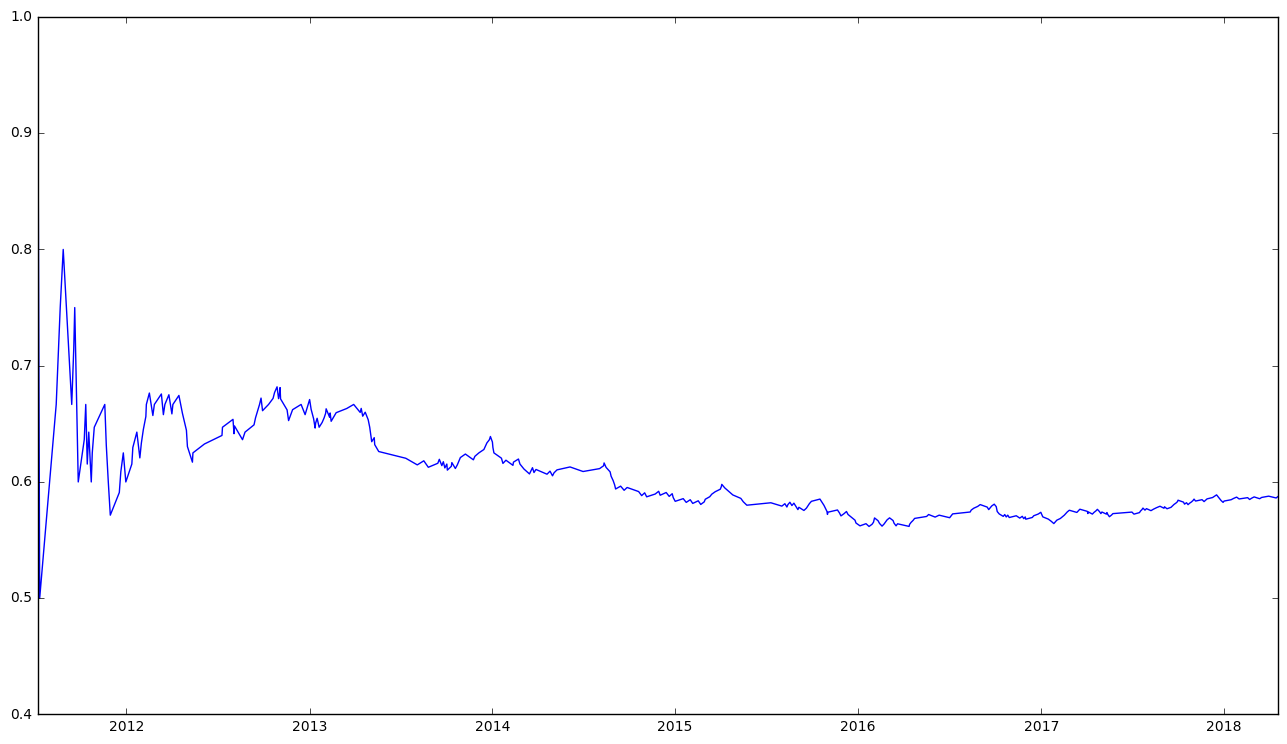

In [9]:
plt.plot(chapter_8.date, chapter_8.ExpRate)

plt.show()

/Users/ZHHR/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  if __name__ == '__main__':


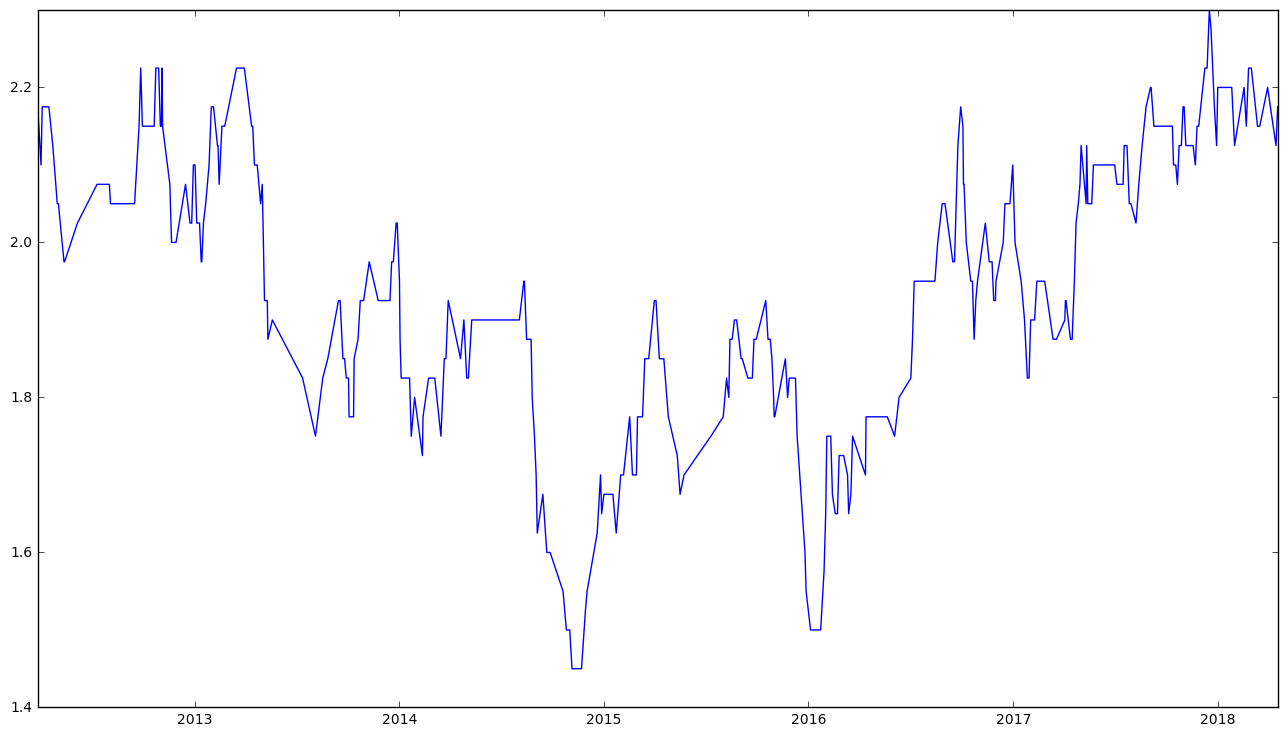

In [11]:
b = pd.rolling_mean(chapter_8.points, 40)
plt.plot(chapter_8.date, b)
plt.show()

## Early Stage

In [ ]:
start_8 = pd.to_datetime('6/1/1992')
end_8 = pd.to_datetime('4/19/2018')
df1 = pd.read_csv('./data/manchester-united/manchester-united_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/manchester-united/manchester-united_1993_1994.csv', index_col=0,  dtype={'points': float})
df3 = pd.read_csv('./data/manchester-united/manchester-united_1994_1995.csv', index_col=0,  dtype={'points': float})
df4 = pd.read_csv('./data/manchester-united/manchester-united_1995_1996.csv', index_col=0,  dtype={'points': float})
df5 = pd.read_csv('./data/manchester-united/manchester-united_1996_1997.csv', index_col=0,  dtype={'points': float})
df6 = pd.read_csv('./data/manchester-united/manchester-united_1997_1998.csv', index_col=0,  dtype={'points': float})
df7 = pd.read_csv('./data/manchester-united/manchester-united_1998_1999.csv', index_col=0,  dtype={'points': float})
df8 = pd.read_csv('./data/manchester-united/manchester-united_1999_2000.csv', index_col=0,  dtype={'points': float})
df9 = pd.read_csv('./data/manchester-united/manchester-united_2000_2001.csv', index_col=0,  dtype={'points': float})
df10 = pd.read_csv('./data/manchester-united/manchester-united_2001_2002.csv', index_col=0,  dtype={'points': float})
df11 = pd.read_csv('./data/manchester-united/manchester-united_2002_2003.csv', index_col=0,  dtype={'points': float})
df12 = pd.read_csv('./data/manchester-united/manchester-united_2003_2004.csv', index_col=0,  dtype={'points': float})

chapter_8_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
chapter_8_raw.date = pd.to_datetime(chapter_8_raw.date)
chapter_8_raw = chapter_8_raw.sort_values(by='date')

mask = (chapter_8_raw.date >= start_8) & (chapter_8_raw.date <= end_8)

chapter_8_raw = chapter_8_raw.loc[mask]
chapter_8_raw = chapter_8_raw.reset_index(drop=True)

In [ ]:
chapter_8 = DataFilter(chapter_8_raw)
chapter_8.tail(5)

In [ ]:
plt.plot(chapter_8.date, chapter_8.ExpRate)

plt.show()

In [ ]:
b = pd.rolling_mean(chapter_8.points, 30)
plt.plot(chapter_8.date, b)
plt.show()

## Last Ten Years

In [24]:
start_8 = pd.to_datetime('6/1/1992')
end_8 = pd.to_datetime('4/19/2018')
df1 = pd.read_csv('./data/manchester-united/manchester-united_2002_2003.csv', index_col=0,  dtype={'points': float})
df2 = pd.read_csv('./data/manchester-united/manchester-united_2003_2004.csv', index_col=0,  dtype={'points': float})
df3 = pd.read_csv('./data/manchester-united/manchester-united_2004_2005.csv', index_col=0,  dtype={'points': float})
df4 = pd.read_csv('./data/manchester-united/manchester-united_2005_2006.csv', index_col=0,  dtype={'points': float})
df5 = pd.read_csv('./data/manchester-united/manchester-united_2006_2007.csv', index_col=0,  dtype={'points': float})
df6 = pd.read_csv('./data/manchester-united/manchester-united_2007_2008.csv', index_col=0,  dtype={'points': float})
df7 = pd.read_csv('./data/manchester-united/manchester-united_2008_2009.csv', index_col=0,  dtype={'points': float})
df8 = pd.read_csv('./data/manchester-united/manchester-united_2009_2010.csv', index_col=0,  dtype={'points': float})
df9 = pd.read_csv('./data/manchester-united/manchester-united_2010_2011.csv', index_col=0,  dtype={'points': float})
df10 = pd.read_csv('./data/manchester-united/manchester-united_2011_2012.csv', index_col=0,  dtype={'points': float})
df11 = pd.read_csv('./data/manchester-united/manchester-united_2012_2013.csv', index_col=0,  dtype={'points': float})
df12 = pd.read_csv('./data/manchester-united/manchester-united_2013_2014.csv', index_col=0,  dtype={'points': float})
df13 = pd.read_csv('./data/manchester-united/manchester-united_2014_2015.csv', index_col=0,  dtype={'points': float})
df14 = pd.read_csv('./data/manchester-united/manchester-united_2015_2016.csv', index_col=0,  dtype={'points': float})
df15 = pd.read_csv('./data/manchester-united/manchester-united_2016_2017.csv', index_col=0,  dtype={'points': float})
df16 = pd.read_csv('./data/manchester-united/manchester-united_2017_2018.csv', index_col=0,  dtype={'points': float})

#chapter_8_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, 
#                           df9, df10, df11, df12, df13, df14, df15, df16])
chapter_8_raw = pd.concat([df6, df7, df8, 
                           df9, df10, df11, df12, df13, df14, df15, df16])
#chapter_8_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
#chapter_8_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

chapter_8_raw.date = pd.to_datetime(chapter_8_raw.date)
chapter_8_raw = chapter_8_raw.sort_values(by='date')

mask = (chapter_8_raw.date >= start_8) & (chapter_8_raw.date <= end_8)

chapter_8_raw = chapter_8_raw.loc[mask]
chapter_8_raw = chapter_8_raw.reset_index(drop=True)

In [25]:
chapter_8 = DataFilter(chapter_8_raw)
chapter_8.tail(5)

,match_type,date,home,away,score,points,Vic,GF,GA,GD,ExpGf,ExpGa,ExpGd,ExpPPM,ExpRate
616,Champions League 2017/2018,2018-03-13,H,Sevilla FC,1:2 (0:0),0.0,0.0,1.0,2.0,-1.0,1.888169,0.896272,0.991896,2.071313,0.628849
617,FA Cup 2017/2018,2018-03-17,H,Brighton & Hove Albion,2:0 (1:0),3.0,1.0,2.0,0.0,2.0,1.888350,0.894822,0.993528,2.072816,0.629450
618,Premier League 2017/2018,2018-03-31,H,Swansea City,2:0 (2:0),3.0,1.0,2.0,0.0,2.0,1.888530,0.893376,0.995153,2.074313,0.630048
619,Premier League 2017/2018,2018-04-15,H,West Bromwich Albion,0:1 (0:0),0.0,0.0,0.0,1.0,-1.0,1.885484,0.893548,0.991935,2.070968,0.629032
620,Premier League 2017/2018,2018-04-18,A,AFC Bournemouth,2:0 (1:0),3.0,1.0,2.0,0.0,2.0,1.885668,0.892110,0.993559,2.072464,0.629630


In [61]:
start_2 = chapter_8.date[0]

start_3 = pd.to_datetime('6/30/2013')
start_4 = pd.to_datetime('4/21/2014')
start_5 = pd.to_datetime('5/23/2016')

x = [start_2, start_3, start_4, start_5]
x1 = [start_2+datetime.timedelta(days=890), start_3+datetime.timedelta(days=16), 
      start_4+datetime.timedelta(days=190), start_5+datetime.timedelta(days=120)]
names = ["Sir Alex", "Moyes", "Van Gal", "Mourinho"]

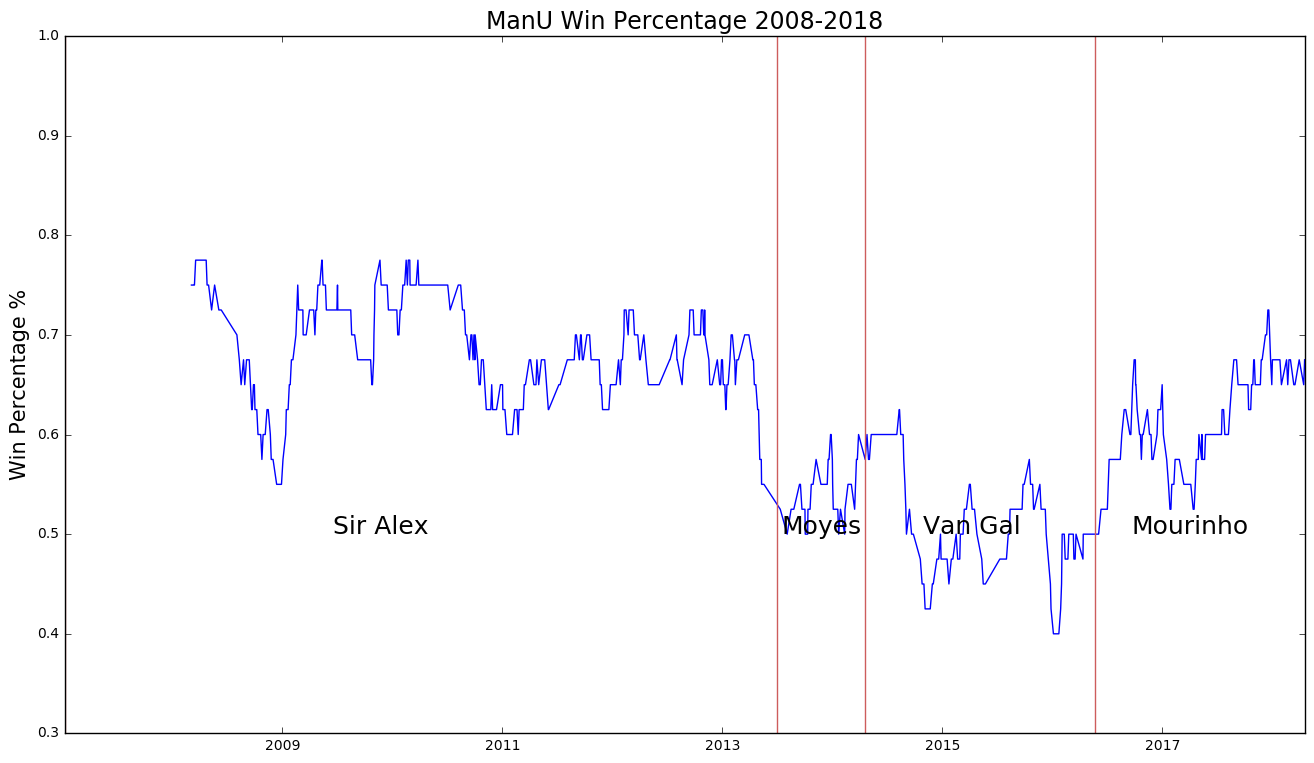

In [76]:
b = chapter_8.Vic.rolling(window=40).mean()
#b = chapter_8.ExpRate

plt.plot(chapter_8.date, b)
plt.ylim([0.3, 1])
plt.ylabel('Win Percentage %', dict(size=15))
plt.title('ManU Win Percentage 2008-2018', dict(size=17))

for i in xrange(len(x)):
    plt.axvline(x[i], c='indianred')
    plt.text(x1[i], 0.5, names[i], dict(size=18), 
             color='black', family='bold')
plt.show()

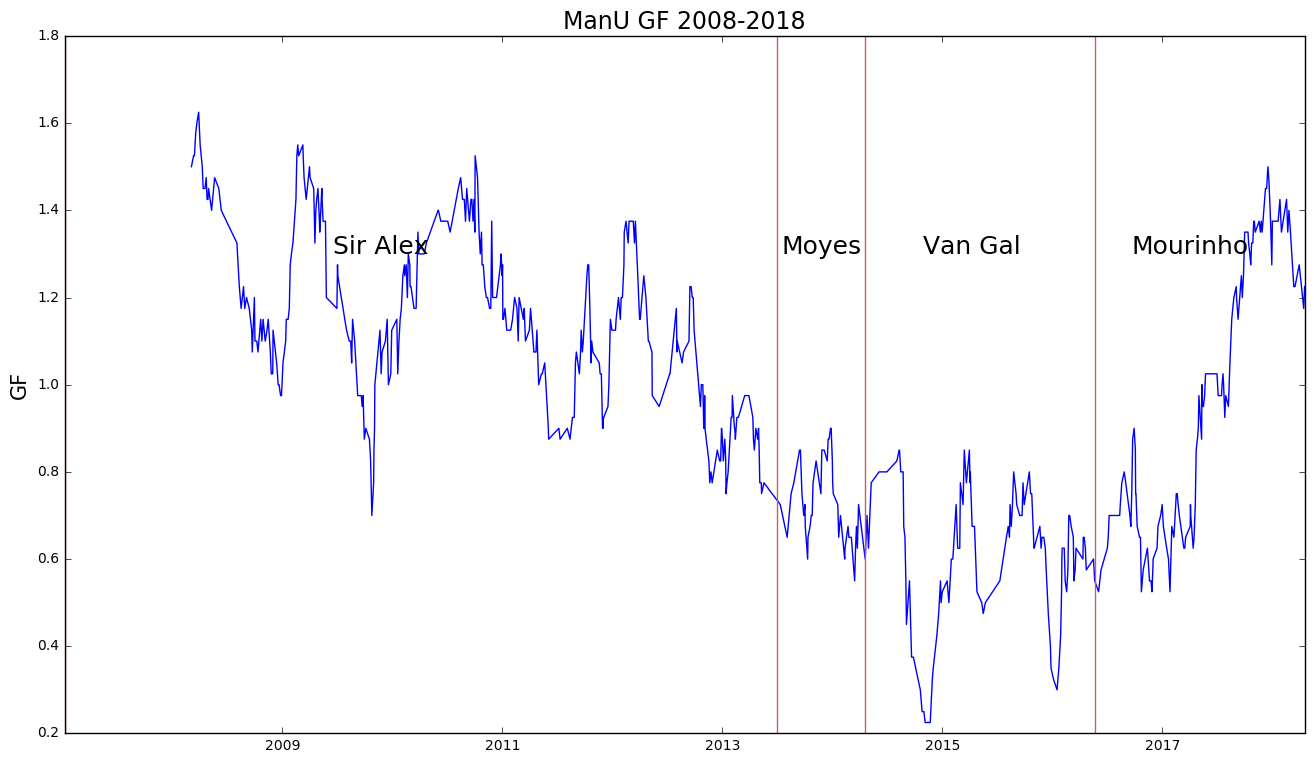

In [77]:
b = chapter_8.GD.rolling(window=40).mean()
#b = chapter_8.ExpRate

plt.plot(chapter_8.date, b)
#plt.ylim([0.3, 1])
plt.ylabel('GF', dict(size=15))
plt.title('ManU GF 2008-2018', dict(size=17))

for i in xrange(len(x)):
    plt.axvline(x[i], c='indianred')
    plt.text(x1[i], 1.3, names[i], dict(size=18), 
             color='black', family='bold')
plt.show()

In [ ]:
x = [start_3, start_4, start_5, start_6, start_7, start_8]
x1 = [start_3+datetime.timedelta(days=260), start_4+datetime.timedelta(days=450), 
      start_5+datetime.timedelta(days=220), start_6+datetime.timedelta(days=190), 
      start_7+datetime.timedelta(days=300), start_8+datetime.timedelta(days=150)]
names = ["Porto", "Chelsea", "Inter", "Real Madrid", "Chelsea", "Man U"]

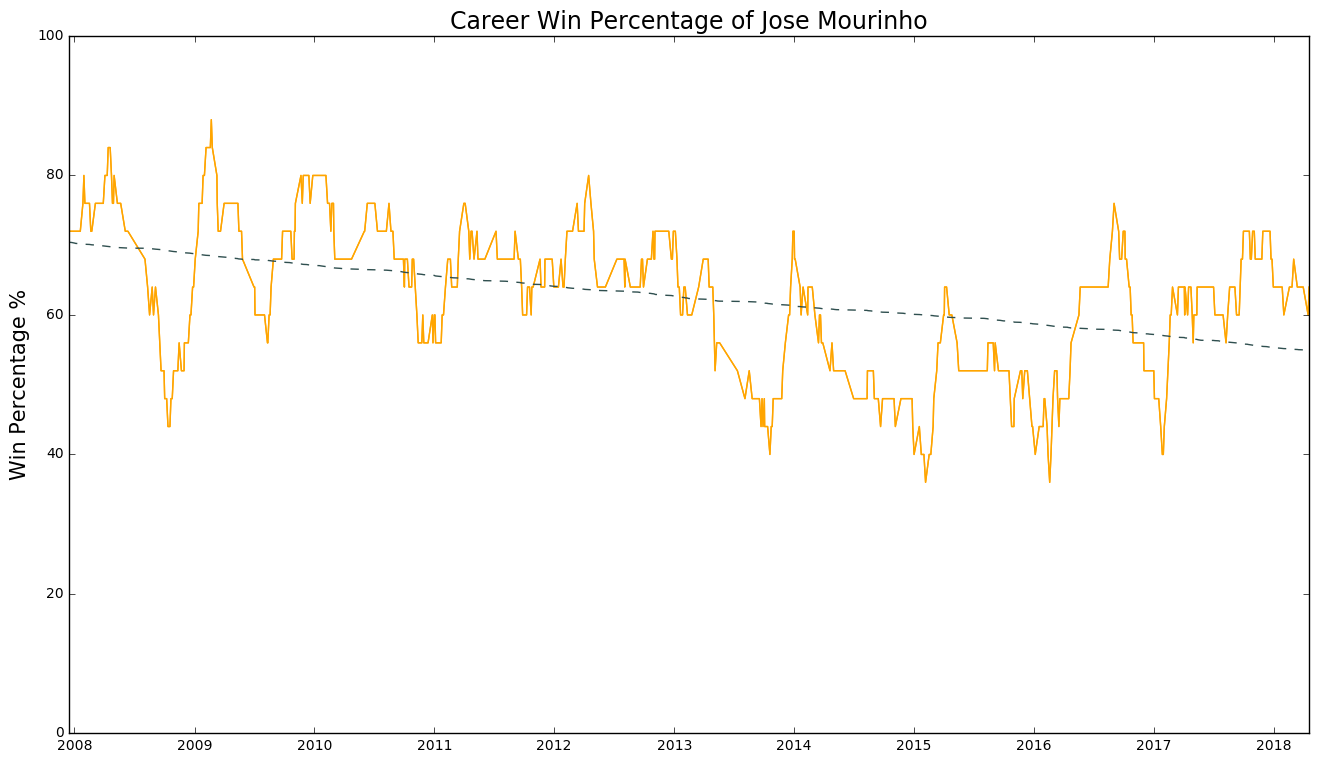

In [28]:
b = chapter_8.Vic.rolling(window=25).mean() * 100
plt.plot(chapter_8.date, b, c='orange')
plt.ylim([0, 100])
plt.ylabel('Win Percentage %', dict(size=15))
plt.title('Career Win Percentage of Jose Mourinho', dict(size=17))
# for i in xrange(len(xposition)):
#     plt.axvline(x[i], c='indianred')
#     plt.text(x1[i], 15, names[i], dict(size=18), 
#              color='black', family='bold')

mask = b.notnull()
xx = np.arange(len(b[mask]))
z = np.polyfit(xx, b[mask], 1)
p = np.poly1d(z)
plt.plot(chapter_8.date[mask],p(xx),"darkslategray", ls='--')

plt.show()
